In [1]:
import pandas as pd

In [2]:
instancesHeader = ['GRAPH', 'SOURCE', 'TARGET']

instancesDf = pd.read_csv('road.inst', delimiter=' ', header=None, names=instancesHeader)
instancesDf['GRAPH'] = instancesDf['GRAPH'].apply(lambda x : x.split('/')[-1])
instancesDf

,GRAPH,SOURCE,TARGET
0,BAY.gr,40024,20419
1,BAY.gr,153504,138526
2,BAY.gr,159934,141029
3,BAY.gr,32927,30737
4,BAY.gr,74477,48020
...,...,...,...
895,W.gr,3808170,1849485
896,W.gr,969414,3905241
897,W.gr,4968006,4824732
898,W.gr,3454426,3866962


In [3]:
resultsHeader = ['ALGO', 'HOST' , 'GRAPH', 'NODES', 'ARCS' ,'SOURCE', 'TARGET', 'ITERATIONS', 'EXTRACTIONS', 'TARGET_SOLUTIONS', 'TIME', 'MEMORY', 'MAX_HEAP_SIZE']

mdaDf = pd.read_csv('mda_road_3d.csv', delimiter=';', header=None, names=resultsHeader)
martinsDf = pd.read_csv('martins_road_3d.csv', delimiter=';', header=None, names=resultsHeader)

mergedDf = pd.merge(instancesDf, mdaDf, on=['GRAPH','SOURCE', 'TARGET'], how='left')
mergedDf = pd.merge(mergedDf, martinsDf, on=['GRAPH', 'SOURCE', 'TARGET', 'NODES', 'ARCS'], how='left', suffixes=("_mda", "_martins"))
mergedDf
mergedDf.loc[mergedDf['TIME_martins']<0.0001, 'TIME_martins'] = 0.0001
mergedDf.loc[mergedDf['TIME_mda']<0.0001, 'TIME_mda'] = 0.0001

In [4]:
mergedDf = mergedDf.loc[mergedDf['TIME_mda'].notna() | mergedDf['TIME_martins'].notna()]
mergedDf.loc[mergedDf['TIME_martins'].isna(), 'TIME_martins'] = 7200
mergedDf['SOLVED_mda'] = mergedDf['TIME_mda'] < 7200
mergedDf['SOLVED_martins'] = mergedDf['TIME_martins'] < 7200
mergedDf

,GRAPH,SOURCE,TARGET,ALGO_mda,HOST_mda,NODES,ARCS,ITERATIONS_mda,EXTRACTIONS_mda,TARGET_SOLUTIONS_mda,...,ALGO_martins,HOST_martins,ITERATIONS_martins,EXTRACTIONS_martins,TARGET_SOLUTIONS_martins,TIME_martins,MEMORY_martins,MAX_HEAP_SIZE_martins,SOLVED_mda,SOLVED_martins
0,BAY.gr,40024,20419,T-MDA,htc-cmp515,321270.0,794830.0,23589.0,23589.0,6.0,...,NAMOA,htc-cmp513,23589.0,23589.0,6.0,0.0066,0.03,184.0,True,True
1,BAY.gr,153504,138526,T-MDA,htc-cmp515,321270.0,794830.0,437854.0,437854.0,45.0,...,NAMOA,htc-cmp513,437854.0,437854.0,45.0,0.3241,0.14,1508.0,True,True
2,BAY.gr,159934,141029,T-MDA,htc-cmp515,321270.0,794830.0,49764.0,49764.0,11.0,...,NAMOA,htc-cmp513,49764.0,49764.0,11.0,0.0167,0.07,858.0,True,True
3,BAY.gr,32927,30737,T-MDA,htc-cmp515,321270.0,794830.0,41635.0,41635.0,14.0,...,NAMOA,htc-cmp513,41635.0,41635.0,14.0,0.0110,0.04,224.0,True,True
4,BAY.gr,74477,48020,T-MDA,htc-cmp515,321270.0,794830.0,28422713.0,28422713.0,10.0,...,NAMOA,htc-cmp513,28422713.0,28422713.0,10.0,180.6464,6.24,12014.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,NY.gr,240556,161332,T-MDA,htc-cmp520,264346.0,730100.0,254869170.0,254869170.0,2965.0,...,NAMOA,htc-cmp512,254869170.0,254869170.0,2965.0,6955.0864,129.76,30652.0,True,True
784,NY.gr,136818,47442,T-MDA,htc-cmp520,264346.0,730100.0,127602118.0,127602118.0,3897.0,...,NAMOA,htc-cmp512,127602118.0,127602118.0,3897.0,2429.5951,66.97,27937.0,True,True
786,NY.gr,183533,36488,T-MDA,htc-cmp520,264346.0,730100.0,286194915.0,286194915.0,14980.0,...,NaN,NaN,NaN,NaN,NaN,7200.0000,NaN,NaN,True,False
794,NY.gr,151087,21712,T-MDA,htc-cmp520,264346.0,730100.0,508570581.0,508570581.0,12057.0,...,NaN,NaN,NaN,NaN,NaN,7200.0000,NaN,NaN,True,False


In [5]:
mergedDf['SPEEDUP'] = mergedDf['TIME_martins']/mergedDf['TIME_mda']
mergedDf['DENSITY'] = mergedDf['ARCS']/mergedDf['NODES']
#mergedDf['DENSITY'] = mergedDf['DENSITY'].apply(lambda x: round(x))
mergedDf['LABELS_PER_SEC_mda'] = mergedDf['EXTRACTIONS_mda']/mergedDf['TIME_mda']
mergedDf['LABELS_PER_SEC_martins'] = mergedDf['EXTRACTIONS_martins']/mergedDf['TIME_martins']

# Density Analysis
Analyze the performance loss of both algorithms as the densities of the graphs increase.

2.3926585962641105 435666.0 46
2.4635659302589916 2758119.0 8
2.4740249634264013 321270.0 65
2.511175512156476 1070376.0 17
2.537316663747587 1524453.0 13
2.7619105263556096 264346.0 73


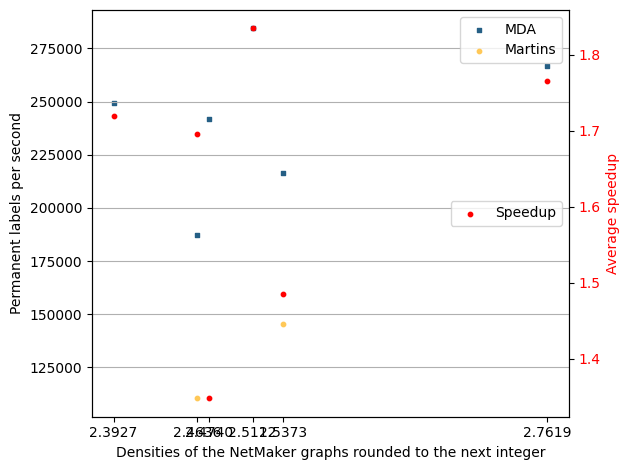

In [7]:
from scipy.stats import gmean
densities = []
densitySpeed = []
densitySpeed_martins = []
densitySpeedup = []
for density, densityDf in mergedDf.groupby(by='DENSITY'):
    print(density, densityDf['NODES'].mean(), len(densityDf))
    densities.append(density)
    densitySpeed.append(gmean(densityDf['LABELS_PER_SEC_mda']))
    densitySpeed_martins.append(gmean(densityDf['LABELS_PER_SEC_martins']))
    densitySpeedup.append(gmean(densityDf['SPEEDUP']))

# print(densities)
# print(densitySpeed)
# print(densitySpeed_martins)
import matplotlib.pyplot as plt

c1 = '#FFC857'
c2 = '#255F85'

mda = list(mergedDf[mergedDf['TIME_mda'].notna()]['LABELS_PER_SEC_mda'])
xmda = list(mergedDf['DENSITY'])
martins = list(mergedDf[mergedDf['TIME_martins'].notna()]['TIME_martins'])
xmartins = list(mergedDf['EXTRACTIONS_martins'])
fig = plt.figure()
fig.patch.set_alpha(0.0)
ax1 = fig.add_subplot(111)

ax1.scatter(densities, densitySpeed, s=10, c=c2, marker="s", label='MDA')
ax1.scatter(densities, densitySpeed_martins, s=10, c=c1, marker="o", label='Martins')
ax1.set_xticks(densities)
#ax1.set_yscale('log')
ax1.yaxis.grid(True)
plt.ylabel('Permanent labels per second')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Densities of the NetMaker graphs rounded to the next integer')
plt.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average speedup', color='red')  # we already handled the x-label with ax1
ax2.scatter(densities, densitySpeedup, s=10, c='red', marker="o", label='Speedup')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='center right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.title(f'Grids 3d')
#plt.savefig(f'./plots/netmaker_3d_martins_mda_densities.svg')
#plt.close()
plt.show()

In [6]:
from scipy.stats import gmean
#extractionLimits = [10**i for i in range (9)]
#extractionLimits
print(f"Density & Instances & avg. $N$ & avg $N_t$ & avg. time mda & avg. time martins & Speedup\\\\")
for density, slicedDf in mergedDf.groupby(by='DENSITY'):
    #print(len(slicedDf), slicedDf['TIME_martins'])
    gmean_mda = gmean(slicedDf.loc[slicedDf['TIME_mda']>=0.0001]['TIME_mda'])
    gmean_martins = gmean(slicedDf.loc[slicedDf['TIME_martins']>=0.0001]['TIME_martins'])
    #gmeanSpeedup = gmean(slicedDf.loc[slicedDf['TIME_martins']>0.0001]['TIME_martins']/slicedDf.loc[slicedDf['TIME_mda']>0.0001]['TIME_mda'])
    gmeanSpeedup = gmean_martins/gmean_mda
    print(f"{density} ")
    print(f"& {len(slicedDf)} & {gmean(slicedDf['EXTRACTIONS_mda']):.2f} & {gmean(slicedDf['TARGET_SOLUTIONS_mda']):.2f}")
    print(f"& {gmean_mda:.4f} & {gmean_martins:.4f}")
    print(f"& {gmeanSpeedup:.2f}\\\\\n")

Density & Instances & avg. $N$ & avg $N_t$ & avg. time mda & avg. time martins & Speedup\\
2.3926585962641105 
& 46 & 19235827.47 & 437.75
& 77.1777 & 132.6996
& 1.72\\

2.4635659302589916 
& 8 & 27515810.26 & 718.88
& 146.8517 & 249.0075
& 1.70\\

2.4740249634264013 
& 65 & 20191649.61 & 579.89
& 83.5272 & 112.5979
& 1.35\\

2.511175512156476 
& 17 & 10898652.80 & 212.08
& 38.3283 & 70.3127
& 1.83\\

2.537316663747587 
& 13 & 29552102.94 & 843.67
& 136.6062 & 202.9140
& 1.49\\

2.7619105263556096 
& 73 & 19070244.84 & 466.21
& 71.5061 & 126.2178
& 1.77\\



In [11]:
import matplotlib.pyplot as plt
c1 = '#FFC857'
c2 = '#255F85'

for graph, graphDf in mergedDf.groupby(by='GRAPH'):
    graph = graph.split('.')[0]
    fig = plt.figure()
    fig.patch.set_alpha(0.0)
    ax1 = fig.add_subplot(111)

    ax1.scatter(graphDf['EXTRACTIONS_mda'], graphDf['TIME_mda'], s=10, c=c2, marker="s", label='MDA')
    ax1.scatter(graphDf['EXTRACTIONS_mda'], graphDf['TIME_martins'], s=10, c=c1, marker="o", label='Martins')
    #ax1.set_xticks(densities)
    #ax1.set_yscale('log')
    ax1.yaxis.grid(True)
    plt.ylabel('Time [s]')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Number $N$ of permanent paths')
    plt.legend()
    plt.title(f'{graph} network')
    plt.savefig(f'./plots/road_3d_martins_mda_time_{graph}.svg')
    #plt.show()
    plt.close()

In [7]:
from scipy.stats import gmean
#extractionLimits = [10**i for i in range (9)]
#extractionLimits
print(f"Network & Solved & avg. $N$ & avg $N_t$ & avg. time mda & Solved & avg. $N$ & avg $N_t$ & avg. time martins & Speedup\\\\")
for graph, slicedDf in mergedDf.groupby(by='GRAPH'):
    #print(len(slicedDf), slicedDf['TIME_martins'])
    gmean_mda = gmean(slicedDf.loc[slicedDf['TIME_mda']>0.0001]['TIME_mda'])
    gmean_martins = gmean(slicedDf.loc[slicedDf['TIME_martins']>0.0001]['TIME_martins'])
    #gmeanSpeedup = gmean(slicedDf.loc[slicedDf['TIME_martins']>0.0001]['TIME_martins']/slicedDf.loc[slicedDf['TIME_mda']>0.0001]['TIME_mda'])
    gmeanSpeedup = gmean_martins/gmean_mda
    solved_martins = len(slicedDf.loc[slicedDf['SOLVED_martins']])
    solved_mda = len(slicedDf.loc[slicedDf['SOLVED_mda']])
    print(f"{graph} ")
    print(f"& {solved_mda} & {gmean(slicedDf['EXTRACTIONS_mda']):.2f} & {gmean(slicedDf['TARGET_SOLUTIONS_mda']):.2f}")
    print(f"& {gmean_mda:.4f}") 
    print(f"& {solved_martins} & {gmean(slicedDf.loc[slicedDf['SOLVED_martins']]['EXTRACTIONS_martins']):.2f} & {gmean(slicedDf.loc[slicedDf['SOLVED_martins']]['TARGET_SOLUTIONS_martins']):.2f} & {gmean_martins:.4f}")
    print(f"& {gmeanSpeedup:.2f}\\\\\n")

Network & Solved & avg. $N$ & avg $N_t$ & avg. time mda & Solved & avg. $N$ & avg $N_t$ & avg. time martins & Speedup\\
BAY.gr 
& 65 & 20191649.61 & 579.89
& 83.5272
& 60 & 16091057.25 & 484.84 & 112.5979
& 1.35\\

COL.gr 
& 46 & 19235827.47 & 437.75
& 104.3098
& 40 & 12268279.58 & 331.59 & 181.5237
& 1.74\\

FLA.xy 
& 17 & 10898652.80 & 212.08
& 38.3283
& 15 & 7390904.21 & 166.57 & 70.3127
& 1.83\\

LKS.xy 
& 8 & 27515810.26 & 718.88
& 146.8517
& 8 & 27515810.26 & 718.88 & 249.0075
& 1.70\\

NE.gr 
& 13 & 29552102.94 & 843.67
& 136.6062
& 13 & 29552102.94 & 843.67 & 202.9140
& 1.49\\

NY.gr 
& 73 & 19070244.84 & 466.21
& 71.5061
& 56 & 8032884.33 & 255.22 & 126.2178
& 1.77\\



In [ ]:
import matplotlib.pyplot as plt

c1 = '#FFC857'
c2 = '#255F85'

for graph, graph_df in mergedDf.groupby(by='GRAPH'):
    mda = list(graph_df[graph_df['TIME_mda'].notna()]['TIME_mda'])
    xmda = list(graph_df['TARGET_SOLUTIONS_mda'])
    #martins = list(mergedDf[mergedDf['TIME_martins'].notna()]['TIME_martins'])
    martins = list(graph_df[graph_df['TIME_martins'].notna()]['TIME_martins'])
    
    xmartins = list(graph_df[graph_df['TIME_martins'].notna()]['TARGET_SOLUTIONS_martins'])
    fig = plt.figure()
    fig.patch.set_alpha(0.0)
    ax1 = fig.add_subplot(111)
    
    ax1.scatter(xmda, mda, s=10, c=c2, marker="s", label='T-MDA')
    ax1.scatter(xmartins, martins, s=10, c=c1, marker="o", label='NAMO$A^{*}_{dr}$-lazy')
    #ax1.set_yscale('log')
    ax1.yaxis.grid(True)
    plt.ylabel('Time [s]')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Cadinality of $P_{st}^*$')
    plt.legend(loc='upper left')
    plt.title(f'{graph.split(".")[0].split("_")[-1]} road network')
    #plt.savefig(f"./plots/road_{graph.split('.')[0].split('_')[-1]}_3d_targeted.svg")
    plt.show()
    plt.close()